# Load and Explore the Data

In [106]:
import pandas as pd
df = pd.read_csv("/kaggle/input/tipping/tips.csv")
df.shape

(244, 7)

In [107]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [109]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Check for Duplicates

In [110]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 1


In [111]:
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [112]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Data Visualization

Histogram of tips

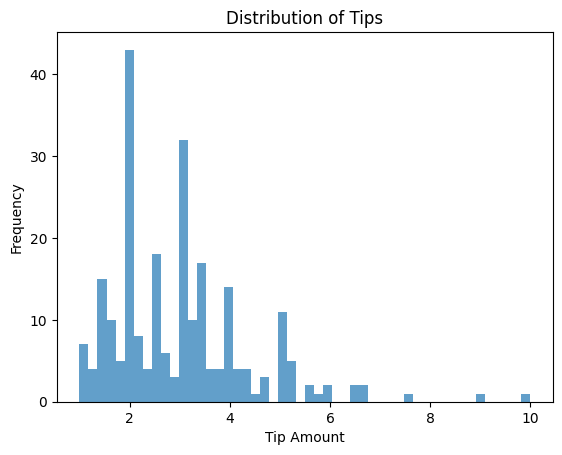

In [113]:
import matplotlib.pyplot as plt


plt.hist(df['tip'], bins=50, alpha=0.7)
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Tips')
plt.show()

Scatter plot: Total Bill vs Tip

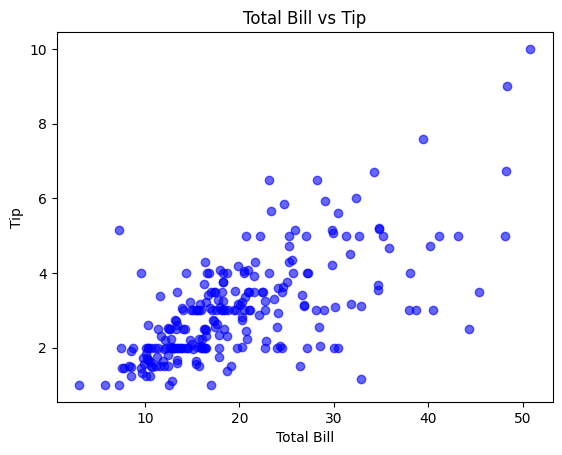

In [114]:
plt.scatter(df['total_bill'], df['tip'], color='blue', alpha=0.6)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

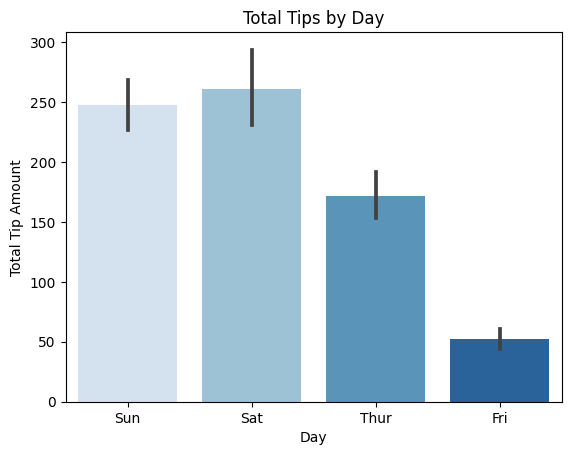

In [115]:
import seaborn as sns


sns.barplot(x='day', y='tip', data=df, estimator=sum, palette='Blues')

plt.title('Total Tips by Day')
plt.xlabel('Day')
plt.ylabel('Total Tip Amount')

plt.show()


In [116]:
import plotly.express as px

px.pie(df, values='tip',names='sex',hole = 0.5).show()

# Convert categorical columns to numeric

In [117]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [118]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [119]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [120]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [121]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


# Feature Engineering

In [122]:
X = df.drop(columns=['tip'])
y = df['tip']


In [123]:
print(X.head()) 

   total_bill  sex  smoker  day  time  size
0       16.99    0       0    3     1     2
1       10.34    1       0    3     1     3
2       21.01    1       0    3     1     3
3       23.68    1       0    3     1     2
4       24.59    0       0    3     1     4


In [124]:
print(y.head()) 

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


# Train-Test Split

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (195, 6)
X_test shape: (49, 6)
y_train shape: (195,)
y_test shape: (49,)


# Linear Regression Model

## Train model

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predictions

In [128]:
y_pred = model.predict(X_test)

## Evaluate model

In [129]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.668572816072287
Mean Squared Error: 0.6963090766605343
R-squared Score: 0.44293996874899033
